In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=d66b1ebb4b709d596aa1c28bc4a6c6e0b33629b3e082a3343ebef8daae354fa6
  Stored in directory: c:\users\prana\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor

In [18]:
apple_training_complete = pd.read_csv('D:\DATA\AAPL.csv')

In [19]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [21]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [22]:
features_set, labels = np.array(features_set), np.array(labels)

In [23]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

In [40]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [41]:
model.add(Dropout(0.2))

In [42]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [43]:
model.add(Dense(units = 1))

In [44]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 24s 150ms/step - loss: 0.0268
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0054
Epoch 3/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0044
Epoch 4/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0041
Epoch 5/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0037
Epoch 7/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0032
Epoch 10/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0034
Epoch 13/100

In [47]:
apple_testing_complete = pd.read_csv(r'D:\DATA\AAPL.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [48]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [49]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [50]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [51]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [52]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [53]:
predictions = model.predict(test_features)

1/1 [==============================] - 4s 4s/step


In [54]:
predictions = scaler.inverse_transform(predictions)

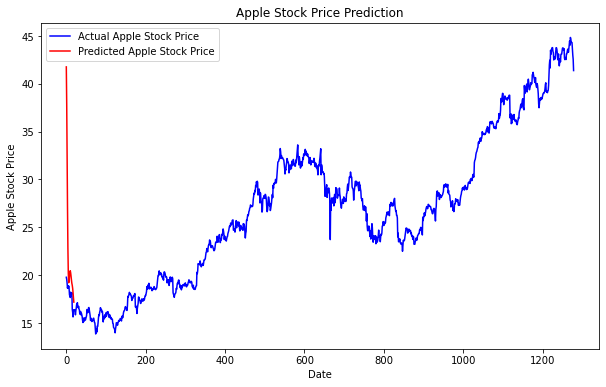

In [55]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()